#  Survey


In [99]:
# Try to use Seaborn/Matplotlib to replicate another cool viz from Cole Nusaumbber Knaflic's book Storytelling with Data.
# Inspiration from :
# https://github.com/adamribaudo/storytelling-with-data-ggplot
# Using code from the excellent:
# https://github.com/empathy87/storytelling-with-data

## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set_style()

In [94]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [100]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

#### Dummy Data

In [149]:

c1 = ['Survey Item A', 'Survey Item B' ,'Survey Item C', 'Survey Item D']
c2 = [1,  5,   8,  11]
c3 = [66, 83,  83, 80]
c4 = [33, 12,  9,  9]

df = pd.DataFrame ({'Item': c1, 
                   'Data_Bottom': c2,
                   'Data_Middle': c3,
                   'Data_Top'   : c4 
                   })

df.head()

,Item,Data_Bottom,Data_Middle,Data_Top
0,Survey Item A,1,66,33
1,Survey Item B,5,83,12
2,Survey Item C,8,83,9
3,Survey Item D,11,80,9


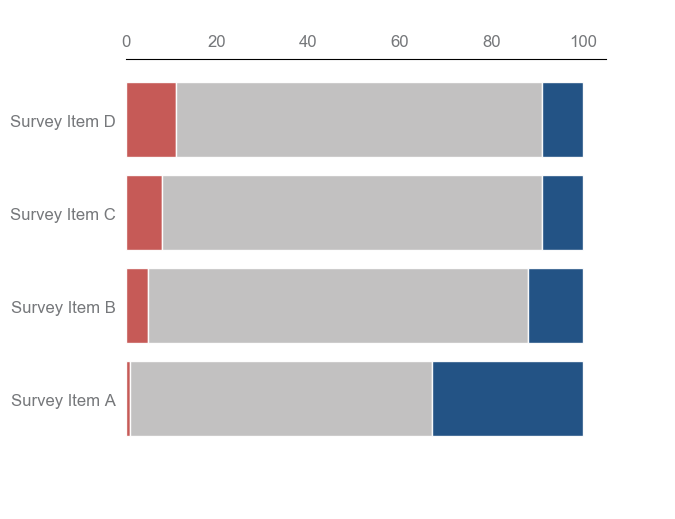

In [202]:
fig = plt.figure(figsize=(6, 5), dpi=100)

# Force figure to be size as above
ax0 = fig.add_axes( (0,0,1,1))
ax0.axis('Off') # don't draw anything.

# Now position the real subplot so that it has a bigger border
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8))

df.plot (kind="barh", alpha=0.95, stacked=True , 
             color =[RED1, GRAY9, BLUE1], 
             ax=ax,  edgecolor = "white", width=0.8) 

ax.yaxis.set_ticklabels( df.Item ,fontsize=12,color=GRAY5 )

# format ticks
plt.tick_params(axis='y',which='both',left=False,right=False) #,labelbottom=False) 

plt.tick_params(axis='x',which='both',top=True ) #,labelbottom=False) 

# Position of ticks...
#ax.tick_params(labelbottom=False,labeltop=True)
ax.xaxis.set_ticks_position('top') # the rest is the same

ax.tick_params(axis='both', which='major', labelsize=12, labelcolor=GRAY5, color=GRAY5)

ax.legend().set_visible(False)
sns.despine (left=True, top=False, bottom=True)




In [73]:
df2 = df.transpose()
df2.columns = df2.iloc[0]
df2 = df2.iloc[ 1: ]
df2

Item,Survey Item A,Survey Item b,Survey Item C,Survey Item D
Data_Bottom,1,5,8,11
Data_Middle,66,83,83,9
Data_Top,33,12,9,9


In [69]:
# This is not needed (it's the ggplot way)
df_long = pd.wide_to_long ( df, stubnames=["Data"], i='Item', j="value", sep="_", suffix='\\w+'  )
df_long = df_long.reset_index()
df_long.head()

,Item,value,Data
0,Survey Item A,Bottom,1
1,Survey Item b,Bottom,5
2,Survey Item C,Bottom,8
3,Survey Item D,Bottom,11
4,Survey Item A,Middle,66


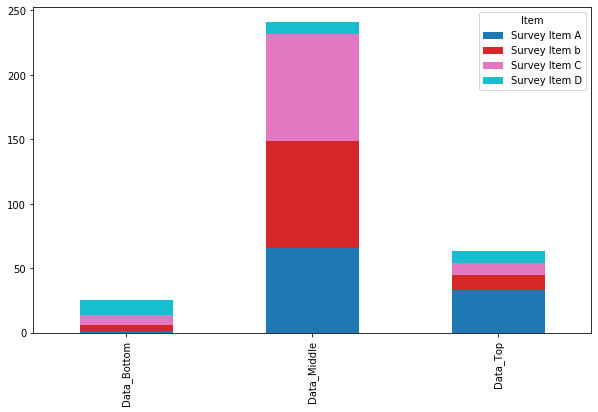

In [72]:
df2.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

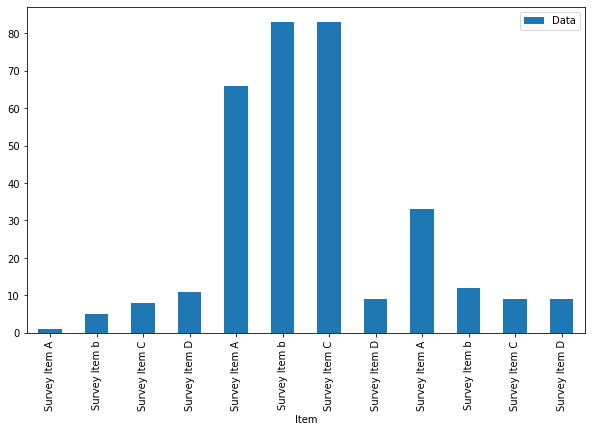

In [56]:
df_long.plot(kind='bar', x= "Item", y="Data",
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

#### Set up some defaults

In [5]:
# General settings for Seaborn

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
#sharpness
plt.rcParams['figure.dpi'] = 1000
#sns.color_palette("muted") 


#### The blog then goes ahead and replicate's Cole's line chart make-over. I have taken that code and modified it to produce the output below. 

In [23]:
pd.wide_to_long ( df, i='item', j='name' )

TypeError: wide_to_long() missing 1 required positional argument: 'stubnames'